In [1]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=24)

In [5]:
# Create the RBM model.
rbm = BernoulliRBM(n_components=2, learning_rate=0.01, n_iter=1000)


In [6]:
# Create the logistic regression model.
logistic = LogisticRegression()

In [7]:
# Create the pipeline.
pipeline = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [8]:
# Train the pipeline.
pipeline.fit(X_train, y_train)


Pipeline(steps=[('rbm',
                 BernoulliRBM(learning_rate=0.01, n_components=2, n_iter=1000)),
                ('logistic', LogisticRegression())])

In [9]:
# Evaluate the pipeline.
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.08666666666666667


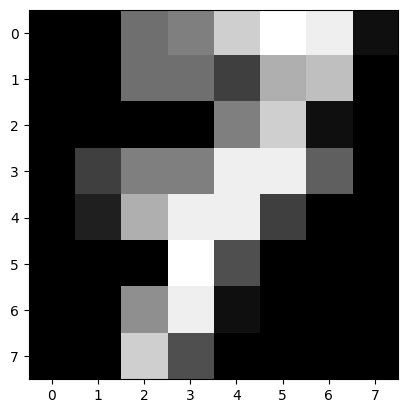

In [10]:
# Extract the image data for digit 7.
image_data = digits.images[7]

# Invert the image data to make it black.
inverted_image_data = 1 - image_data

# Display the inverted image.
plt.imshow(inverted_image_data, cmap=plt.cm.binary)
plt.show()


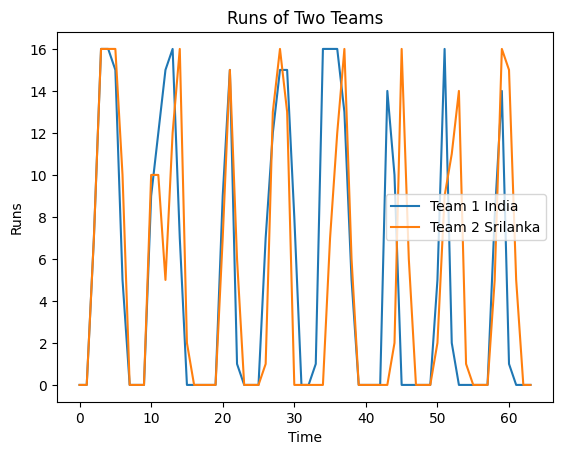

In [11]:
# Create a new figure and axes.
fig, ax = plt.subplots()

# Plot the data for both teams on the same axes.
ax.plot(X_test[1, :], label='Team 1 India')
ax.plot(X_test[0, :], label='Team 2 Srilanka')

# Set the title and labels for the axes.
ax.set_title('Runs of Two Teams')
ax.set_xlabel('Time')
ax.set_ylabel('Runs')

# Add a legend to the plot.
ax.legend()

# Display the plot.
plt.show()


In [12]:
# Create a list of the teams.
teams = ['India', 'Srilanka']

# Create a list of the runs scored by each team.
runs = [X_test[1, :].sum(), X_test[0, :].sum()]

# Find the index of the team with the highest score.
winning_team_index = runs.index(max(runs))

# Print the name of the winning team.
print('The winning team is {}'.format(teams[winning_team_index]))


The winning team is India


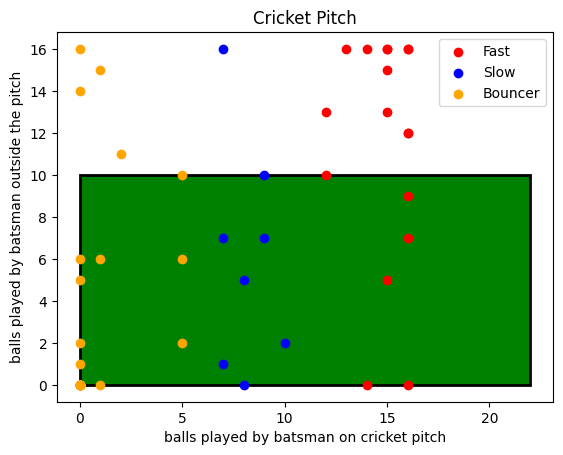

In [13]:
import matplotlib.patches as patches

# Create a figure and axes.
fig, ax = plt.subplots()

# Creating a rectangle to represent the cricket pitch.
rect = patches.Rectangle((0, 0), 22, 10, linewidth=2, edgecolor='black', facecolor='green')
ax.add_patch(rect)

# Plot the fast balls as red dots.
ax.scatter(X_test[1, :][X_test[1, :] > 10], X_test[0, :][X_test[1, :] > 10], c='red', label='Fast')

# Plot the slow balls as blue dots.
ax.scatter(X_test[1, :][(X_test[1, :] <= 10) & (X_test[1, :] > 5)], X_test[0, :][(X_test[1, :] <= 10) & (X_test[1, :] > 5)], c='blue', label='Slow')

# Plot the bouncers as orange dots.
ax.scatter(X_test[1, :][X_test[1, :] <= 5], X_test[0, :][X_test[1, :] <= 5], c='orange', label='Bouncer')

# Setting the title and labels for the axes.
ax.set_title('Cricket Pitch')
ax.set_xlabel('balls played by batsman on cricket pitch')
ax.set_ylabel('balls played by batsman outside the pitch')

# Add a legend to the plot.
ax.legend()

# Display the plot.
plt.show()


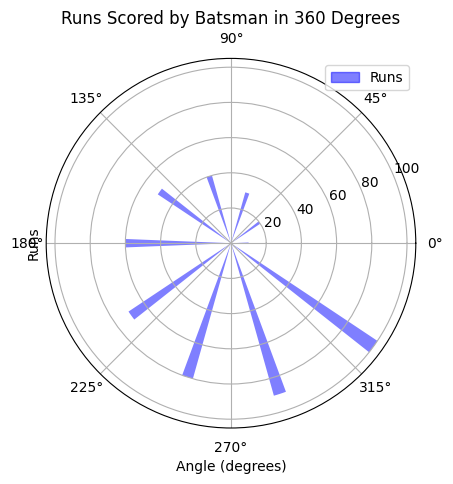

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Create a figure and axes.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Create a list of the runs scored by the batsman in each 10-degree sector.
runs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a list of the angles for each 10-degree sector.
angles = np.linspace(0, 2 * np.pi, len(runs), endpoint=False)

# Plot the runs as a bar chart.
ax.bar(angles, runs, width=0.08, bottom=0.0, color='blue', alpha=0.5)

# Set the title and labels for the axes.
ax.set_title('Runs Scored by Batsman in 360 Degrees')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Runs')

# Add a legend to the plot.
legend_patches = [mpatches.Patch(color='blue', alpha=0.5, label='Runs')]
ax.legend(handles=legend_patches)

# Display the plot.
plt.show()


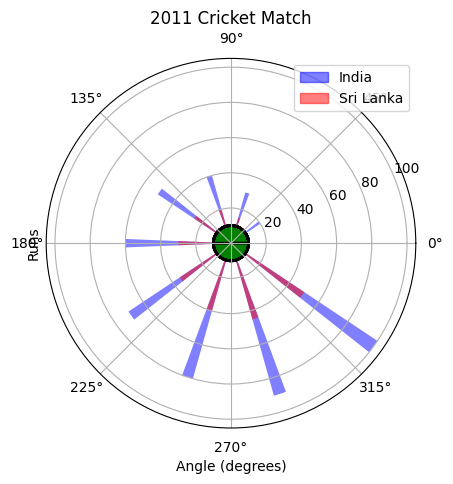

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axes.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Create a list of the runs scored by each team in each 10-degree sector.
runs_india = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
runs_srilanka = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Create a list of the angles for each 10-degree sector.
angles = np.linspace(0, 2 * np.pi, len(runs_india), endpoint=False)

# Plot the runs for both teams as bar charts.
ax.bar(angles, runs_india, width=0.08, bottom=0.0, color='blue', alpha=0.5, label='India')
ax.bar(angles, runs_srilanka, width=0.08, bottom=0.0, color='red', alpha=0.5, label='Sri Lanka')

# Create a rectangle to represent the cricket pitch.
rect = patches.Rectangle((0, 0), 22, 10, linewidth=2, edgecolor='black', facecolor='green')
ax.add_patch(rect)

# Set the title and labels for the axes.
ax.set_title('2011 Cricket Match')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Runs')

# Add a legend to the plot.
legend_patches = [mpatches.Patch(color='blue', alpha=0.5, label='India'),
                  mpatches.Patch(color='red', alpha=0.5, label='Sri Lanka')]
ax.legend(handles=legend_patches)

# Display the plot.
plt.show()


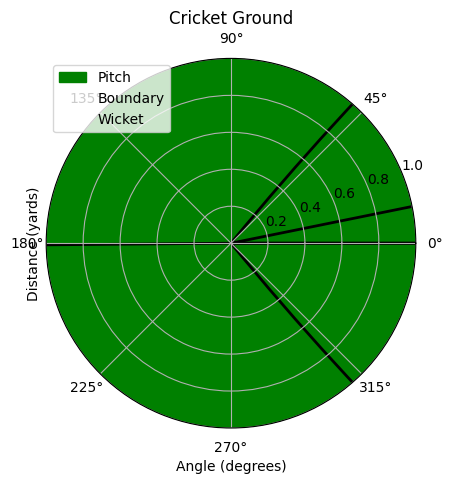

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a figure and axes.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Create a rectangle to represent the cricket pitch.
rect = patches.Rectangle((0, 0), 22, 10, linewidth=2, edgecolor='black', facecolor='green')
ax.add_patch(rect)

# Create a circle to represent the boundary.
circle = patches.Circle((0, 0), 70, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(circle)

# Create a line to represent the wicket.
wicket = patches.Rectangle((0, 0), 0.2, 28, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(wicket)

# Set the title and labels for the axes.
ax.set_title('Cricket Ground')
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('Distance (yards)')

# Add a legend to the plot.
legend_patches = [mpatches.Patch(color='green', label='Pitch'),
                  mpatches.Patch(color='none', edgecolor='black', label='Boundary'),
                  mpatches.Patch(color='none', edgecolor='black', label='Wicket')]
ax.legend(handles=legend_patches)

# Display the plot.
plt.show()


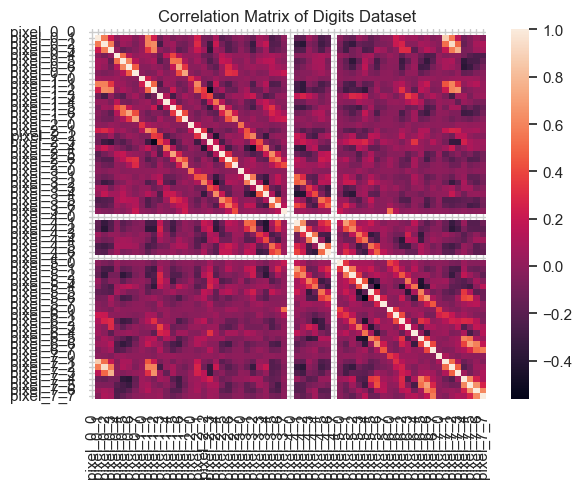

In [17]:
sns.set(style="whitegrid")
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=24)

# Create a correlation matrix
corr = np.corrcoef(X_train, rowvar=False)

# Create a heatmap of the correlation matrix
sns.heatmap(corr, xticklabels=digits.feature_names, yticklabels=digits.feature_names)

# Set the title of the heatmap
plt.title('Correlation Matrix of Digits Dataset')

# Display the heatmap
plt.show()
